<a href="https://colab.research.google.com/github/subhayuroy/BirdMigration_Tracking/blob/main/Migration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!unzip SAPA_Aug2019-shapefile.zip

Archive:  SAPA_Aug2019-shapefile.zip
   creating: SAPA_Aug2019-shapefile/
  inflating: SAPA_Aug2019-shapefile/SAPA_Aug2019-shapefile-polygons.prj  
   creating: __MACOSX/
   creating: __MACOSX/SAPA_Aug2019-shapefile/
  inflating: __MACOSX/SAPA_Aug2019-shapefile/._SAPA_Aug2019-shapefile-polygons.prj  
  inflating: SAPA_Aug2019-shapefile/SAPA_Aug2019-shapefile-polygons.dbf  
  inflating: __MACOSX/SAPA_Aug2019-shapefile/._SAPA_Aug2019-shapefile-polygons.dbf  
  inflating: SAPA_Aug2019-shapefile/SAPA_Aug2019-shapefile-polygons.cpg  
  inflating: __MACOSX/SAPA_Aug2019-shapefile/._SAPA_Aug2019-shapefile-polygons.cpg  
  inflating: SAPA_Aug2019-shapefile/SAPA_Aug2019-shapefile-polygons.shp  
  inflating: __MACOSX/SAPA_Aug2019-shapefile/._SAPA_Aug2019-shapefile-polygons.shp  
  inflating: SAPA_Aug2019-shapefile/SAPA_Aug2019-shapefile-polygons.shx  
  inflating: __MACOSX/SAPA_Aug2019-shapefile/._SAPA_Aug2019-shapefile-polygons.shx  
  inflating: __MACOSX/._SAPA_Aug2019-shapefile  


Understanding migration patterns of purple martins.

These birds typically spend the summer breeding season in the **eastern United States**, and then migrate to **South America** for the winter. But since this bird is under threat of endangerment, we'd like to take a closer look at the ***locations that these birds are more likely to visit***

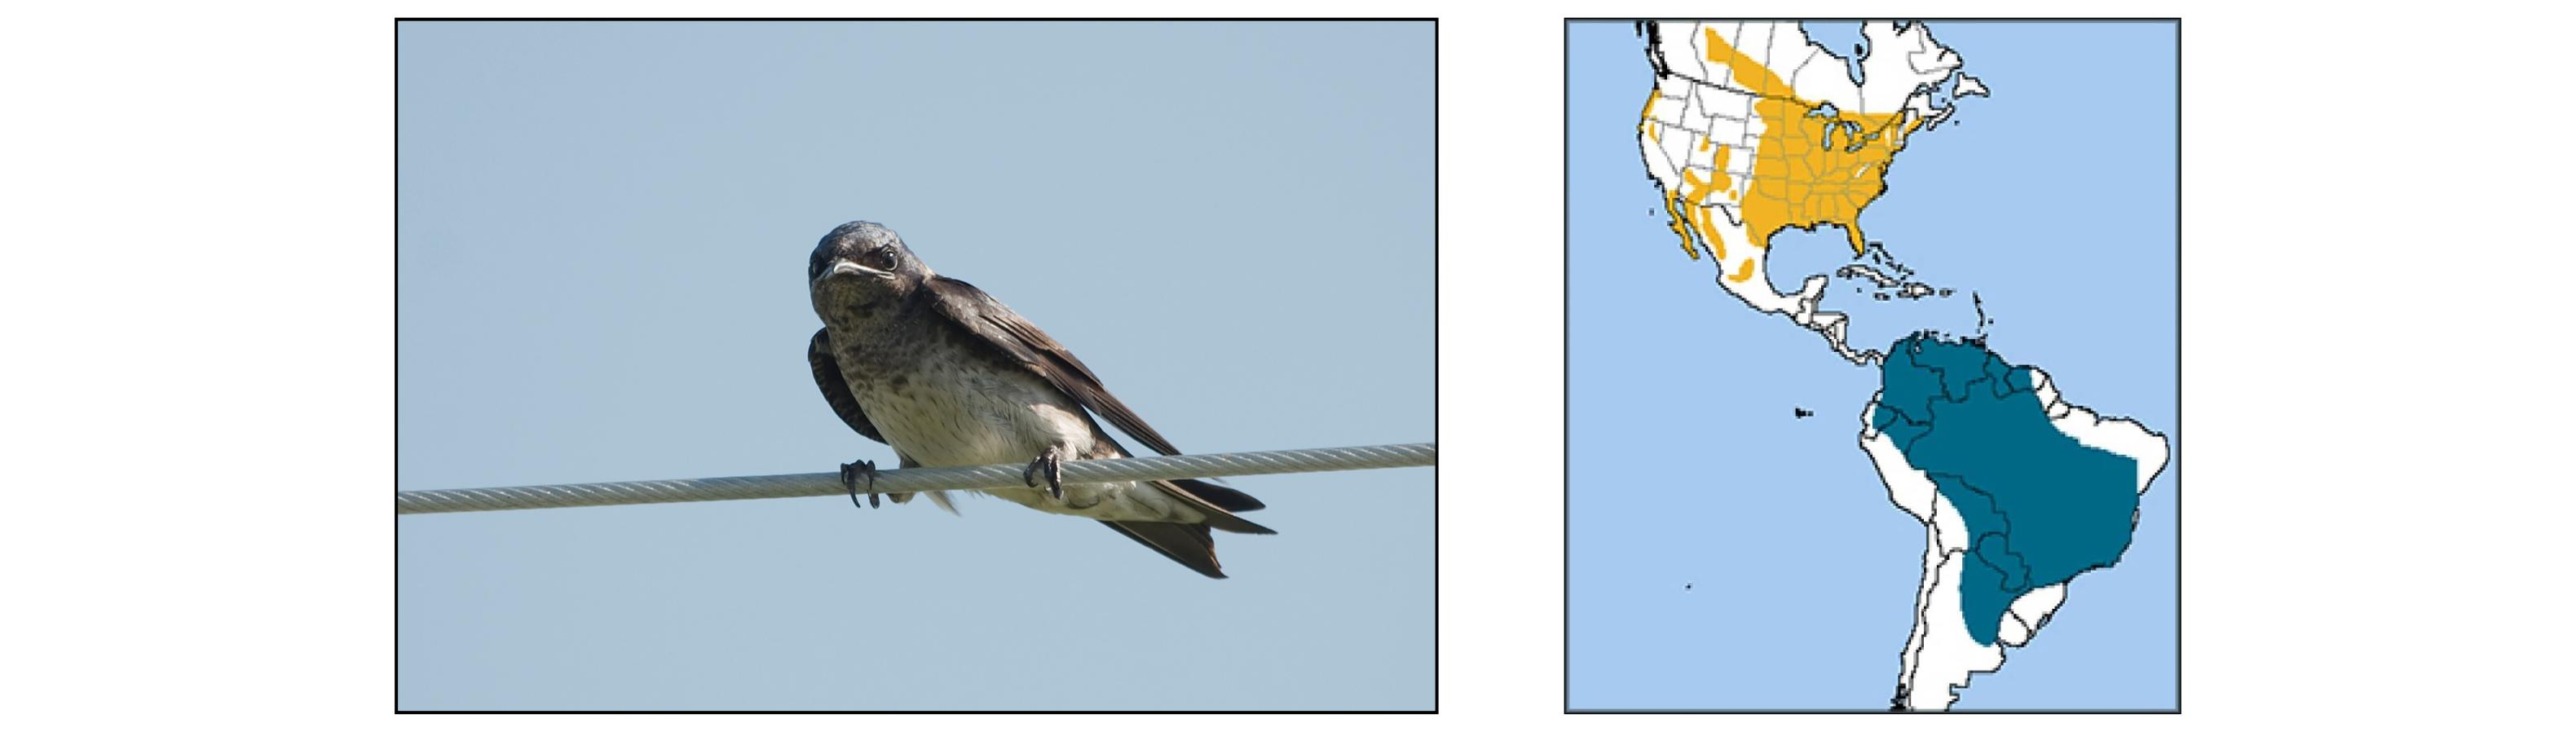

There are several protected areas in South America, which operate under special regulations to ensure that species that migrate (or live) there have the best opportunity to thrive. 

We'd like to know if purple martins tend to visit these areas. To answer this question, you'll use some recently collected data that tracks the year-round location of eleven different birds.

In [8]:
!pip install geopandas

     |████████████████████████████████| 972kB 7.9MB/s 
     |████████████████████████████████| 14.8MB 258kB/s 
     |████████████████████████████████| 10.9MB 23.4MB/s 


In [9]:
import pandas as pd
import geopandas as gpd

from shapely.geometry import LineString

**Loading data**

In [11]:
birds_df = pd.read_csv("/content/purple_martin.csv", parse_dates=['timestamp'])
print("There are {} different birds in the dataset.".format(birds_df["tag-local-identifier"].nunique()))

There are 11 different birds in the dataset.


In [12]:
birds_df.head()

,timestamp,location-long,location-lat,tag-local-identifier
0,2014-08-15 05:56:00,-88.146014,17.513049,30448
1,2014-09-01 05:59:00,-85.243501,13.095782,30448
2,2014-10-30 23:58:00,-62.906089,-7.852436,30448
3,2014-11-15 04:59:00,-61.776826,-11.723898,30448
4,2014-11-30 09:59:00,-61.241538,-11.612237,30448


**Creating the GeoDataFrame**

In [13]:
birds = gpd.GeoDataFrame(birds_df, geometry=gpd.points_from_xy(birds_df["location-long"], birds_df["location-lat"]))

birds.crs = {'init' :'epsg:4326'}

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


##Plot the data

**Load a GeoDataFrame with country boundaries in North/South America**

In [14]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
americas = world.loc[world['continent'].isin(['North America', 'South America'])]

In [15]:
americas.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
9,44293293,South America,Argentina,ARG,879400.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."
10,17789267,South America,Chile,CHL,436100.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.63335..."
16,10646714,North America,Haiti,HTI,19340.0,"POLYGON ((-71.71236 19.71446, -71.62487 19.169..."


(-30.0, 60.0)

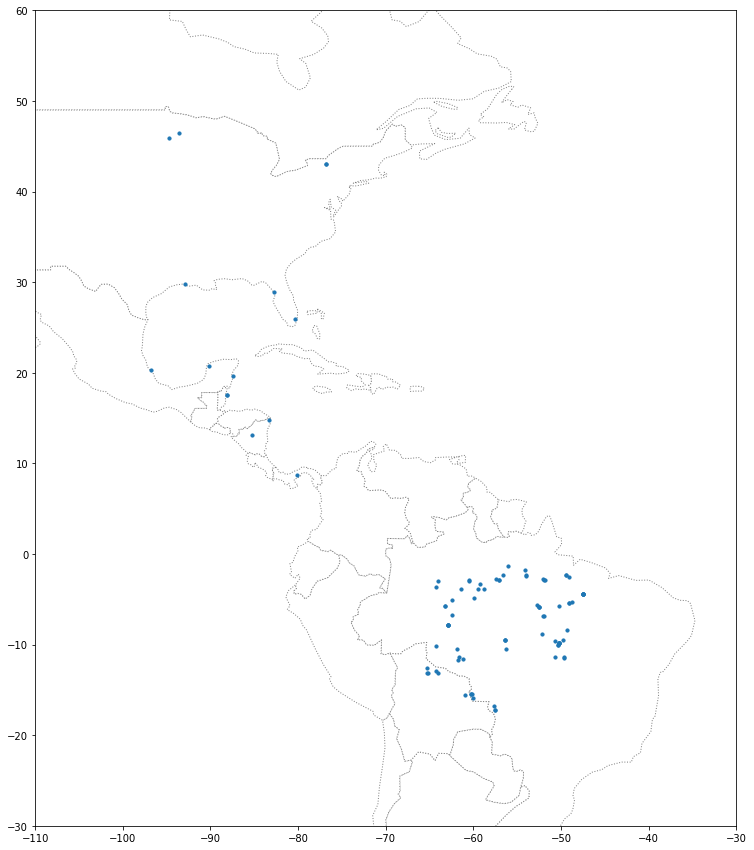

In [18]:
ax = americas.plot(figsize=(15,15), color='white', linestyle=':', edgecolor='gray')
birds.plot(ax=ax, markersize=10)

ax.set_xlim([-110, -30])
ax.set_ylim([-30, 60])

###Where does each bird start and end its journey? 

**GeoDataFrame showing path for each bird**

In [19]:
path_df = birds.groupby("tag-local-identifier")['geometry'].apply(list).apply(lambda x: LineString(x)).reset_index()
path_gdf = gpd.GeoDataFrame(path_df, geometry=path_df.geometry)
path_gdf.crs = {'init' :'epsg:4326'}

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


**GeoDataFrame showing starting point for each bird**

In [20]:
start_df = birds.groupby("tag-local-identifier")['geometry'].apply(list).apply(lambda x: x[0]).reset_index()
start_gdf = gpd.GeoDataFrame(start_df, geometry=start_df.geometry)
start_gdf.crs = {'init' :'epsg:4326'}

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


**GeoDataFrame containing the final location of each bird**

In [21]:
end_df = birds.groupby("tag-local-identifier")['geometry'].apply(list).apply(lambda x: x[-1]).reset_index()
end_gdf = gpd.GeoDataFrame(end_df, geometry=end_df.geometry)
end_gdf.crs = {'init': 'epsg:4326'}

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
